

#**NETFLIX YOUTUBE DATA ANALYSIS:**

---




### Importing required libraries


In [ ]:
#libraries
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter

#for langugage processing
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

from wordcloud import WordCloud

import random as random

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

# Set the figure background color
plt.figure(facecolor='#111827')
mpl.rcParams.update({
    'figure.facecolor': '#111827',  # Entire figure background color
    'axes.facecolor': '#111827',   # Axes background color
    'axes.edgecolor': 'white',     # Axes borders (spines) color
    'axes.labelcolor': 'white',    # Axes label color
    'xtick.color': 'white',        # X-axis tick color
    'ytick.color': 'white',        # Y-axis tick color
    'axes.spines.top': False,      # Remove the top spine (border)
    'axes.spines.right': False,    # Remove the right spine (border)
    'axes.spines.left': True,      # Keep the left spine
    'axes.spines.bottom': True,    # Keep the bottom spine
    'grid.color': 'gray',          # Grid line color (optional)
    'grid.alpha': 0.5,             # Grid line transparency
    'savefig.facecolor': '#111827' # Background for saved figures
})
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable


import warnings
warnings.filterwarnings("ignore")

!pip3 install sentencepiece
!pip3 install tf_sentencepiece

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<Figure size 640x480 with 0 Axes>

In [ ]:
#reading the data


df = pd.read_csv("/content/netflix_india_yt_data.csv")
print("Number of Rows and Columns",df.shape)
print("_"*50)
df.head(2)

Number of Rows and Columns (5198, 11)
__________________________________________________


,video_id,title,description,tags,publishedAt,thumbnails,liveBroadcastContent,viewCount,likeCount,commentCount,duration
0,KQ2a4uawQBo,Meet THE REAL Honey Singh | Yo Yo Honey Singh:...,Honey Singh shares his battles with mental hea...,"['angreji beat', 'dope shope', 'honey singh', ...",2024-12-20T08:00:00Z,{'default': {'url': 'https://i.ytimg.com/vi/KQ...,none,52864,7111.0,394.0,PT1M11S
1,bOR7S0j_wq8,⁠Akshay Kumar ALMOST Gets Caught Cheating! 👀 f...,Brb taking notes on how to lie like a pro 👀\r\...,"['aditya seal', 'akshay kumar', 'akshay kumar ...",2024-12-19T12:30:00Z,{'default': {'url': 'https://i.ytimg.com/vi/bO...,none,44300,642.0,30.0,PT3M2S


In [ ]:
df.describe()

,viewCount,likeCount,commentCount
count,5.198000e+03,5.197000e+03,5191.000000
mean,2.154679e+06,2.635686e+04,654.778463
std,1.794774e+07,9.341496e+04,2021.089963
min,0.000000e+00,1.200000e+01,0.000000
25%,5.890825e+04,1.245000e+03,43.000000
50%,2.210810e+05,4.499000e+03,144.000000
75%,9.379675e+05,1.930900e+04,507.500000
max,8.883307e+08,3.192608e+06,59038.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   video_id              5198 non-null   object 
 1   title                 5198 non-null   object 
 2   description           5191 non-null   object 
 3   tags                  5177 non-null   object 
 4   publishedAt           5198 non-null   object 
 5   thumbnails            5198 non-null   object 
 6   liveBroadcastContent  5198 non-null   object 
 7   viewCount             5198 non-null   int64  
 8   likeCount             5197 non-null   float64
 9   commentCount          5191 non-null   float64
 10  duration              5198 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 446.8+ KB


In [ ]:
#checking for the duplicates


df['video_id'].duplicated().sum()

64

In [ ]:
#finding the duplicates

duplicated_data = df[df['video_id'].duplicated()]
duplicated_data['video_id'].value_counts()

,count
video_id,
#NAME?,64


In [ ]:
# Remove rows where 'video_id' is '#NAME?'


df = df[df['video_id'] != '#NAME?']
print("Rows after deletion:", df.shape[0])

Rows after deletion: 5133


In [ ]:
#Making the format of data right


df['publishedAt'] = pd.to_datetime(df['publishedAt'])

In [ ]:
#function to comvert hr,min,sec to hrs


def youtube_duration_to_minutes(duration):
    # Initialize variables for hours, minutes, and seconds
    hours, minutes, seconds = 0, 0, 0

    # Parse the string directly
    duration = duration[2:]  # Remove 'PT'
    if 'H' in duration:
        hours, duration = duration.split('H')
        hours = int(hours)
    if 'M' in duration:
        minutes, duration = duration.split('M')
        minutes = int(minutes)
    if 'S' in duration:
        seconds = int(duration.strip('S'))

    # Calculate total minutes
    return hours * 60 + minutes + seconds / 60



# Apply the function and convert to minutes
df['duration'] = df['duration'].apply(youtube_duration_to_minutes)

In [ ]:
df.head(2)

,video_id,title,description,tags,publishedAt,thumbnails,liveBroadcastContent,viewCount,likeCount,commentCount,duration
0,KQ2a4uawQBo,Meet THE REAL Honey Singh | Yo Yo Honey Singh:...,Honey Singh shares his battles with mental hea...,"['angreji beat', 'dope shope', 'honey singh', ...",2024-12-20 08:00:00+00:00,{'default': {'url': 'https://i.ytimg.com/vi/KQ...,none,52864,7111.0,394.0,1.183333
1,bOR7S0j_wq8,⁠Akshay Kumar ALMOST Gets Caught Cheating! 👀 f...,Brb taking notes on how to lie like a pro 👀\r\...,"['aditya seal', 'akshay kumar', 'akshay kumar ...",2024-12-19 12:30:00+00:00,{'default': {'url': 'https://i.ytimg.com/vi/bO...,none,44300,642.0,30.0,3.033333


In [ ]:
#checking for min and max value in duration

min_duration = df['duration'].min()
max_duration = df['duration'].max()

print("Minimum Duration:", min_duration)
print("Maximum Duration:", max_duration)

Minimum Duration: 0.0
Maximum Duration: 171.41666666666666


In [ ]:
# Function to categorize the duration based on the video duration


def categorize_duration(duration):
    if duration <= 5:
        return 'Short(<=5)'
    elif 5 < duration <= 30:
        return 'Medium(6-30)'
    else:
        return 'Long(>30)'


# Apply the function to create a new column
df['duration_category'] = df['duration'].apply(categorize_duration)

df.head(2)

,video_id,title,description,tags,publishedAt,thumbnails,liveBroadcastContent,viewCount,likeCount,commentCount,duration,duration_category
0,KQ2a4uawQBo,Meet THE REAL Honey Singh | Yo Yo Honey Singh:...,Honey Singh shares his battles with mental hea...,"['angreji beat', 'dope shope', 'honey singh', ...",2024-12-20 08:00:00+00:00,{'default': {'url': 'https://i.ytimg.com/vi/KQ...,none,52864,7111.0,394.0,1.183333,Short(<=5)
1,bOR7S0j_wq8,⁠Akshay Kumar ALMOST Gets Caught Cheating! 👀 f...,Brb taking notes on how to lie like a pro 👀\r\...,"['aditya seal', 'akshay kumar', 'akshay kumar ...",2024-12-19 12:30:00+00:00,{'default': {'url': 'https://i.ytimg.com/vi/bO...,none,44300,642.0,30.0,3.033333,Short(<=5)


In [ ]:
np.percentile(df['duration'],[25,50,75,83,95])

array([ 1.4       ,  2.23333333,  3.51666667,  5.126     , 15.10333333])

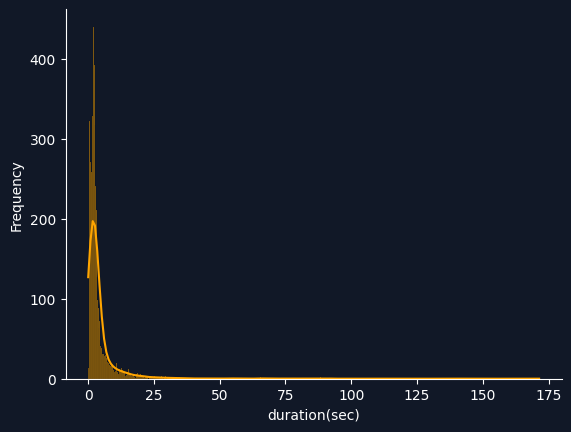

In [ ]:
#Distibution of "Duration"

sns.histplot(df['duration'], kde=True, color='orange')
plt.xlabel('duration(sec)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration')


plt.show()

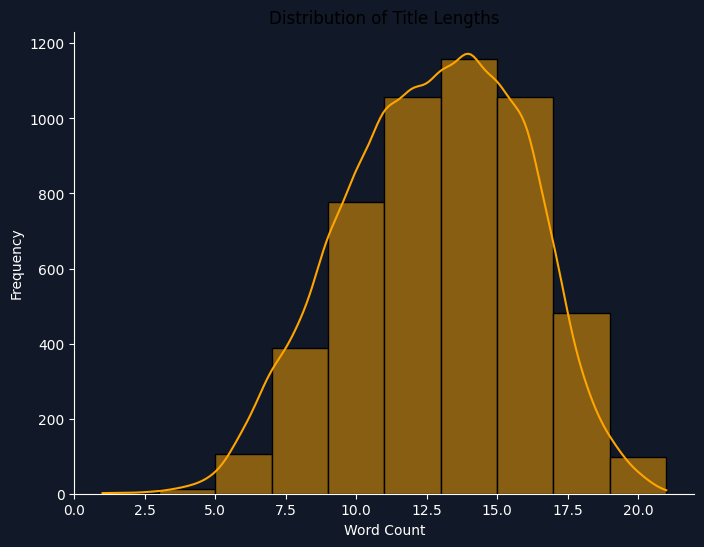

In [ ]:
# Check the length of each text in the 'Text' column
text_lengths = df['title'].str.split().apply(len)

# Plot the distribution using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(text_lengths, bins=10, kde=True, color='orange')

plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Title Lengths')

plt.show()



---



##1. Does Duration of video influence the views and comments ?

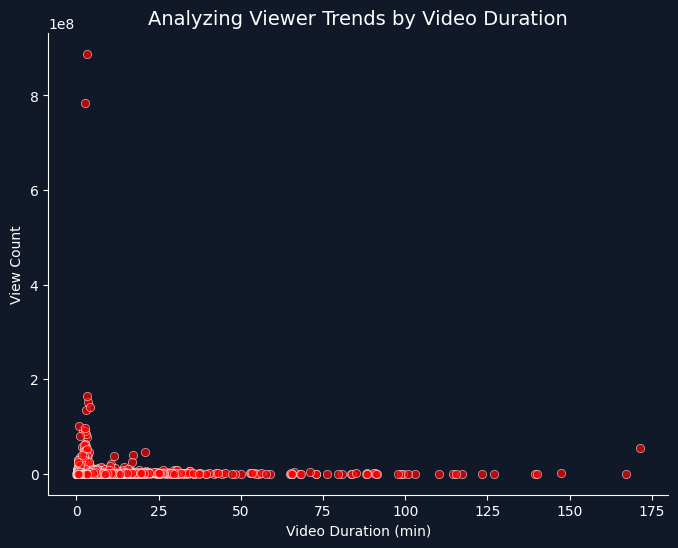

In [ ]:
# Create the scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='duration', y='viewCount', color='red', alpha=0.7)

# Add title and labels
plt.title("Analyzing Viewer Trends by Video Duration", color='white', fontsize=14)
plt.xlabel("Video Duration (min)", color='white')
plt.ylabel("View Count", color='white')

# Show the plot
plt.show()


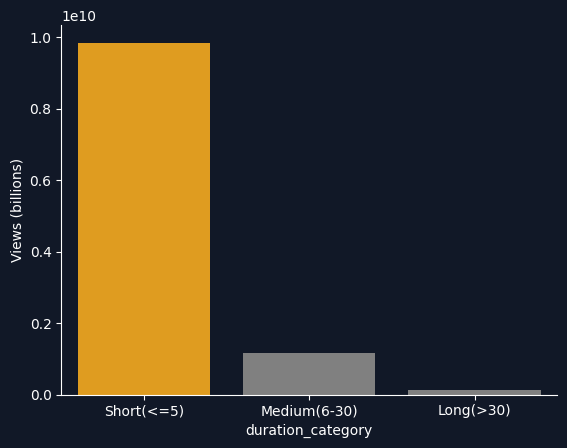

In [ ]:
grouped_data = df.groupby('duration_category', as_index=False)['viewCount'].sum()

# Sort the data by views to identify the highest
grouped_data = grouped_data.sort_values(by='viewCount', ascending=False)

# Assign colors: red for the highest and grey for the rest
colors = ['orange' if x == grouped_data['viewCount'].max() else 'grey' for x in grouped_data['viewCount']]

# Create the bar plot
sns.barplot(data=grouped_data, x='duration_category', y='viewCount', palette=colors)

# Add labels and title
plt.ylabel('Views (billions)')

# Show the plot
plt.show()

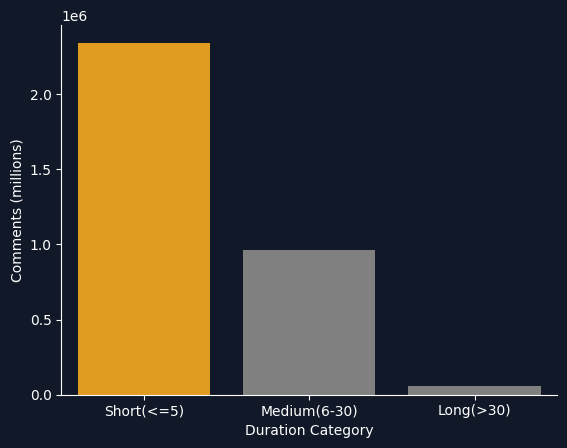

In [ ]:
grouped_data = df.groupby('duration_category', as_index=False)['commentCount'].sum()

# Sort the data by views to identify the highest
grouped_data = grouped_data.sort_values(by='commentCount', ascending=False)

# Assign colors: red for the highest and grey for the rest
colors = ['orange' if x == grouped_data['commentCount'].max() else 'grey' for x in grouped_data['commentCount']]

# Create the bar plot
sns.barplot(data=grouped_data, x='duration_category', y='commentCount', palette=colors)

# Add labels and title
plt.xlabel('Duration Category')
plt.ylabel('Comments (millions)')

# Show the plot
plt.show()

In [ ]:
filtered_df = df[df['duration'] < 5]

# Calculate the total views
total_views = df['viewCount'].sum()

# Calculate the views below the threshold
views_below_threshold = filtered_df['viewCount'].sum()

# Calculate the percentage
print("Percentage of views below 5min : ",(views_below_threshold / total_views) * 100)
print(filtered_df['viewCount'].sum())

Percentage of views below 5min :  88.46161938691361
9849021852


In [ ]:
filtered_df = df[df['duration'] < 5]

# Calculate the total views
total_comment = df['commentCount'].sum()

# Calculate the views below the threshold
comment_below_threshold = filtered_df['commentCount'].sum()

# Calculate the percentage
print("Percentage of commentCount below 5min : ",(comment_below_threshold / total_comment) * 100)
print(filtered_df['commentCount'].sum())

Percentage of commentCount below 5min :  69.75014212206028
2342230.0


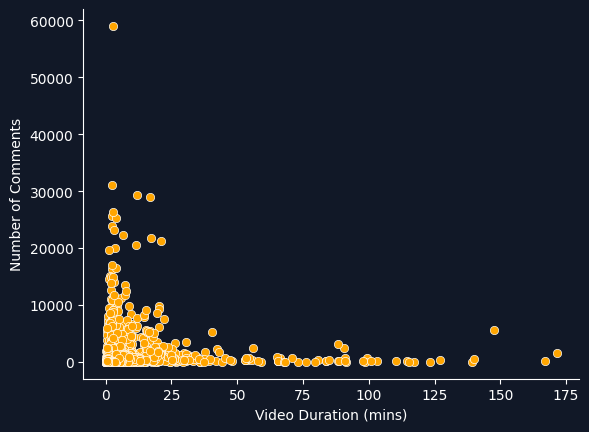

In [ ]:
sns.scatterplot(data=df, x='duration', y='commentCount', color='orange')

# Add title and labels
#plt.title("Relationship Between Video Duration and Comments", color='white', fontsize=14)
plt.xlabel("Video Duration (mins)", color='white')
plt.ylabel("Number of Comments", color='white')

# Show the plot
plt.show()


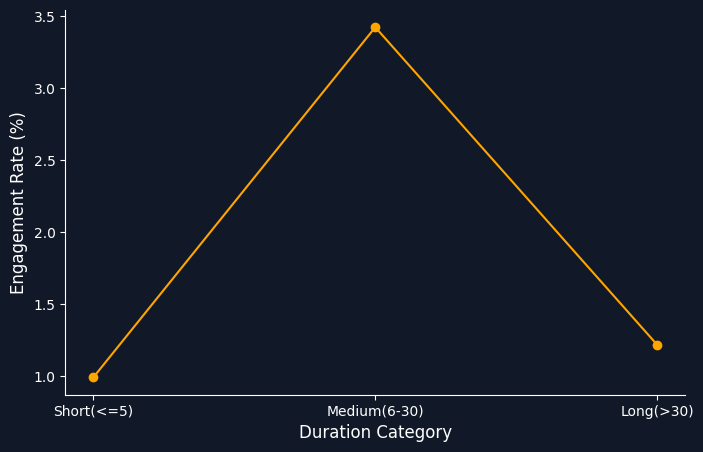

In [ ]:
# Group by 'duration_category' and calculate the sum of required columns in one step
engagement_data = df.groupby('duration_category', as_index=False).agg(
    likeCount=('likeCount', 'sum'),
    commentCount=('commentCount', 'sum'),
    viewCount=('viewCount', 'sum')
)

# Calculate engagement rate directly
engagement_data['rate (%)'] = ((engagement_data['likeCount'] + engagement_data['commentCount']) / engagement_data['viewCount']) * 100

# Sort the DataFrame by viewCount
engagement_data = engagement_data.sort_values(by='viewCount', ascending=False)

# Plot the line chart
plt.figure(figsize=(8, 5))
plt.plot(engagement_data['duration_category'], engagement_data['rate (%)'], marker='o', color='orange')

# Add titles and labels
#plt.title('Engagement Rate by Duration Category (Ordered by View Count)', fontsize=14)
plt.xlabel('Duration Category', fontsize=12)
plt.ylabel('Engagement Rate (%)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

In [ ]:
engagement_data['rate (%)'].mean()

1.8771428071666751

## 2. Is there a relation between the views and comments?

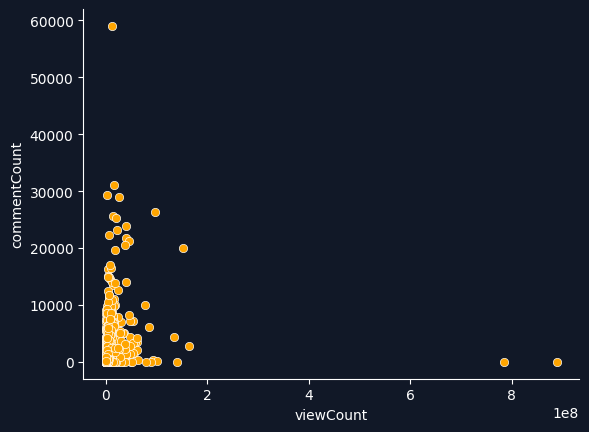

In [ ]:
sns.scatterplot(data=df,x='viewCount',y='commentCount',color='orange')
#plt.title("Relationship Between View Count and Comment Count")
plt.show()

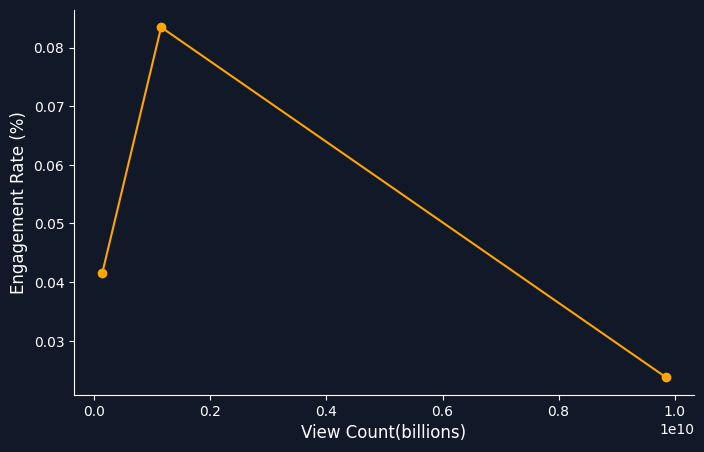

In [ ]:
# Calculate engagement rate directly
engagement_data['comment rate (%)'] = (engagement_data['commentCount'] / engagement_data['viewCount']) * 100

# Sort the DataFrame by viewCount
engagement_data = engagement_data.sort_values(by='viewCount', ascending=False)

# Plot the line chart
plt.figure(figsize=(8, 5))
plt.plot(engagement_data['viewCount'], engagement_data['comment rate (%)'], marker='o', color='orange')

# Add titles and labels
#plt.title('Engagement Rate by Duration Category (Ordered by View Count)', fontsize=14)
plt.xlabel('View Count(billions)', fontsize=12)
plt.ylabel('Engagement Rate (%)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

## 3.Does tag count matter to get more views?

---



<Figure size 1000x600 with 0 Axes>

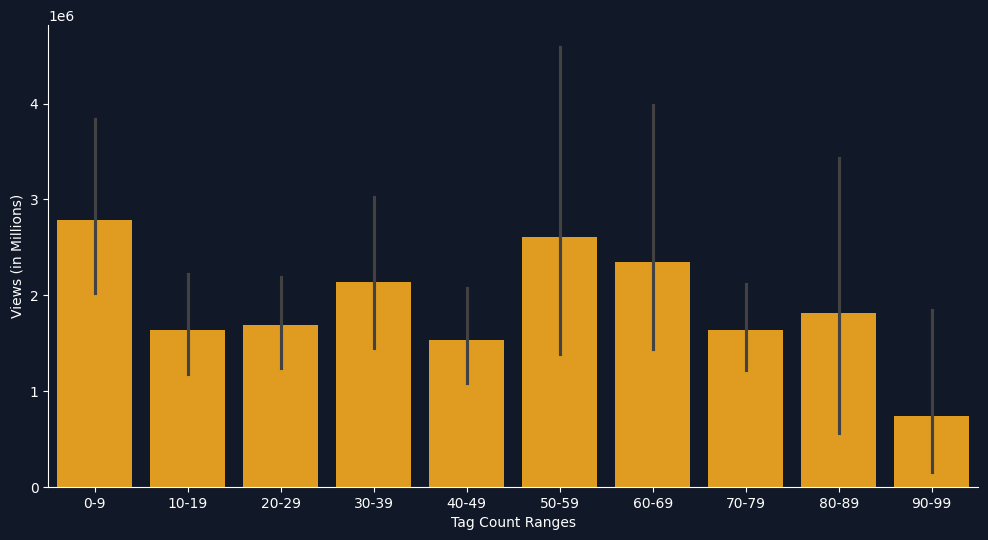

In [ ]:
# Replace null values with an empty string and calculate tag counts
df['tags'] = df['tags'].fillna('')
df['tag_count'] = df['tags'].str.split( ).apply(len)

# Plot the relationship between tag count and views
plt.figure(figsize=(10, 6))
# Create dynamic bins for tag_count
bins = range(0, 110, 10)  # Bins: 0-9, 10-19, ..., 100-109
labels = [f"{i}-{i+9}" for i in bins[:-1]]  # Create labels for bins
df['tag_count_bins'] = pd.cut(df['tag_count'], bins=bins, labels=labels, right=False)

# Plot the relationship between tag count and views
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='tag_count_bins', y='viewCount', color='orange')

# Add labels and title
plt.xlabel('Tag Count Ranges')
plt.ylabel('Views (in Millions)')
#plt.title('Relationship Between Tag Count and Views')

# Show the plot
plt.show()

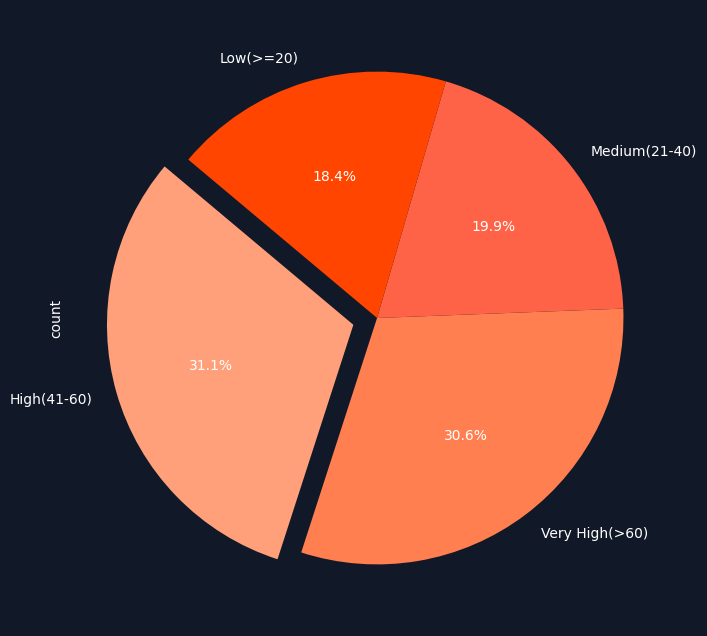

In [ ]:
# Define categories based on tag_count ranges
def categorize_tags(count):
    if 0 <= count <= 20:
        return "Low(>=20)"
    elif 21 <= count <= 40:
        return "Medium(21-40)"
    elif 41 <= count <= 60:
        return "High(41-60)"
    else:
        return "Very High(>60)"

# Apply the categorization
df['tag_category'] = df['tag_count'].apply(categorize_tags)

# Calculate category distribution
category_distribution = df['tag_category'].value_counts()

# Identify the category with the highest value
max_category = category_distribution.idxmax()

# Create the explode list
explode = [0.1 if category == max_category else 0 for category in category_distribution.index]

colors = ['#FFA07A', '#FF7F50', '#FF6347', '#FF4500']  # Light to dark orange shades

# Create the pie plot
plt.figure(figsize=(8, 8))
category_distribution.plot.pie(
    autopct='%1.1f%%',  # Add percentages
    colors=colors,  # Orange shades
    startangle=140,  # Start angle for better rotation
    labels=category_distribution.index,  # Add category labels
    explode=explode,  # Dynamically explode the highest category
    textprops={'color': 'white'}  # Set text color to white
)

# Add title
#plt.title('Distribution of Tag Categories', color='white')  # Set title color to white

# Set background to black
plt.gca().set_facecolor('black')
plt.show()

## 4. Does video publishing day or time influence the engagement?

In [ ]:
# Convert 'publishedAt' column to datetime format
df['day'] = df['publishedAt'].dt.day_name()
df['time'] = df['publishedAt'].dt.time
df['publishedAt'] = df['publishedAt'].dt.date

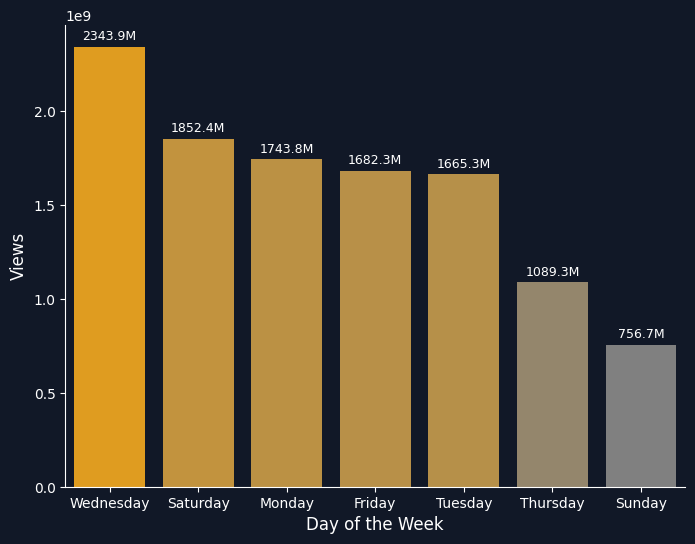

In [ ]:
# Get the total views per day and sort in descending order
day_counts = df.groupby('day')['viewCount'].sum().sort_values(ascending=False)

# Create a custom colormap transitioning from grey to red
custom_cmap = LinearSegmentedColormap.from_list("GreyToRed", ["grey", "orange"])

# Normalize counts for shading
norm = Normalize(vmin=day_counts.values.min(), vmax=day_counts.values.max())
sm = ScalarMappable(cmap=custom_cmap, norm=norm)
colors = [sm.to_rgba(value) for value in day_counts.values]

# Plot the bar chart with shading
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=day_counts.index, y=day_counts.values, palette=colors)

# Annotate counts in millions
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1e6:.1f}M',  # Convert to millions and format
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='white', xytext=(0, 5),
                textcoords='offset points')

# Add labels and title
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Views', fontsize=12)
#plt.title('Total Views Per Day', fontsize=14)

# Show the plot
plt.show()


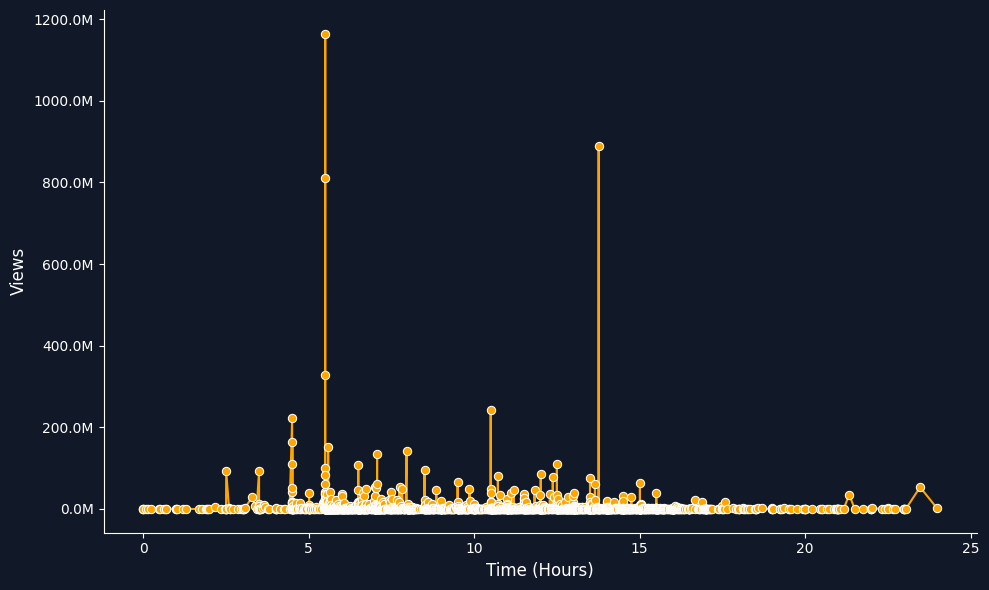

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Convert the time column to datetime.time format if it's in string format
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

# Calculate total hours
df['time(hr)'] = df['time'].apply(lambda t: t.hour + t.minute / 60 + t.second / 3600)

# Group by 'time(hr)' and calculate total viewCount for each hour
time_view_counts = df.groupby('time(hr)')['viewCount'].sum().reset_index()

# Plot the distribution of viewCount over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_view_counts, x='time(hr)', y='viewCount', color='orange', marker='o')

# Add labels and title
plt.xlabel('Time (Hours)', fontsize=12)
plt.ylabel('Views', fontsize=12)
#plt.title('View Count Distribution Over Time', fontsize=14)

# Format y-axis to show view counts in millions
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
filtered_df = df[(df['time(hr)'] >12) & (df['time(hr)'] <=18) ]

# Calculate the total views
total_views = df['viewCount'].sum()

# Calculate the views below the threshold
views_below_threshold = filtered_df['viewCount'].sum()

# Calculate the percentage
(views_below_threshold / total_views) * 100


25.450287121407417

## 5. Which video is most popular on our channel and break down the reasons why it worked well.

In [ ]:
# Find the maximum view count
max_views = df['viewCount'].max()

# Filter the DataFrame to find the video with the maximum view count
popular = df[df['viewCount'] == max_views]

# Split the title by '|' and print it
print("Title : ")
print(popular['title'].str.split('|').tolist())
print('_' * 30)

# Split the tags by ',' and print them
print("Tags :")
print(popular['tags'].str.split(',').tolist())


Title : 
[['Mighty Little Bheem ', ' Bheem with a Beat ', ' Netflix India']]
______________________________
Tags :
[["['Adventure'", " 'Indian'", " 'videos'", " 'animated shows on netflix'", " 'Jungle'", " 'funny kids shows'", " 'Videos for kids'", " 'show'", " 'Animals'", " 'mighty little bheem clips'", " 'Cartoon'", " 'Mighty Little Bheem'", " 'Drums'", " 'Indian shows for kids'", " 'kid series on netflix'", " 'comedy videos'", " 'funny videos'", " 'kids series'", " 'netflix india orignals'", " 'mighty little bheem'", " 'Kids'", " 'netflix india animated series'", " 'kids shows on netflix'", " 'clips'", " 'netflix kids'", " 'animation'", " 'mighty bheem videos'", " 'Shows for kids']"]]


In [ ]:
popular

,video_id,title,description,tags,publishedAt,thumbnails,liveBroadcastContent,viewCount,likeCount,commentCount,duration,duration_category,tag_count,tag_count_bins,tag_category,day,time,time(hr)
4916,U15sCqscZAk,Mighty Little Bheem | Bheem with a Beat | Netf...,Mighty Little Bheem has all the animals in the...,"['Adventure', 'Indian', 'videos', 'animated sh...",2019-04-24,{'default': {'url': 'https://i.ytimg.com/vi/U1...,none,888330690,3192608.0,0.0,3.266667,Short(<=5),64,60-69,Very High(>60),Wednesday,13:45:42,13.761667


## 6. Does title length influence views?

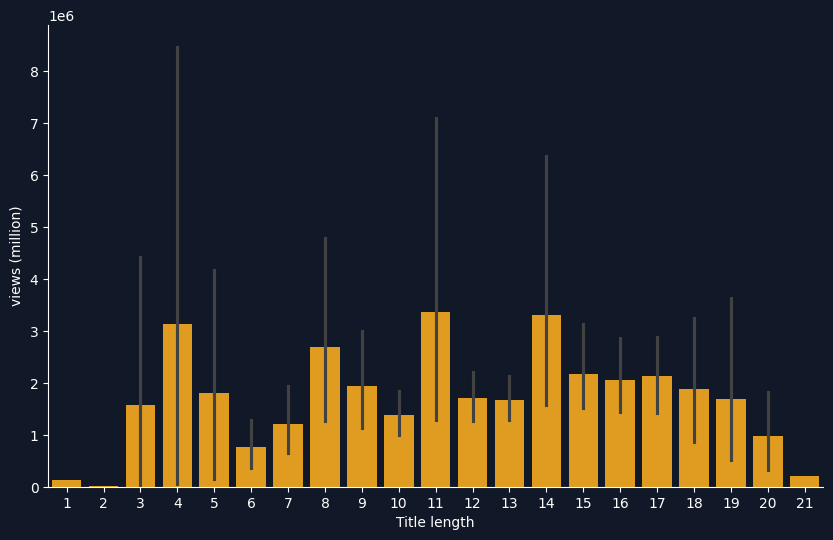

In [ ]:
# Check the length of each text in the 'Text' column
title_length = df['title'].str.split().apply(len)

# Plot the relationship between tag count and views
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x=title_length, y='viewCount', color='orange')

# Add labels and title
plt.xlabel('Title length')
plt.ylabel('views (million)')

# Show the plot
plt.show()


In [ ]:
title_length.median()

13.0

In [ ]:
# Example list of video titles
title_lengths = ["Short(<=7)", "Medium(8-15)", "Long(>15)"]

# Function to categorize titles
def categorize_titles(title):
    word_count = len(title.split())
    if word_count <= 7:
        return "Short(<=7)"
    elif word_count <= 15:
        return "Medium(8-15)"
    else:
        return "Long(>15)"

# Apply categorization
df['title_length'] = df['title'].apply(categorize_titles)

# Calculate total views for each category
category_views = df.groupby('title_length')['viewCount'].sum()
category_views

,viewCount
title_length,
Long(>15),2186381009
Medium(8-15),8606948034
Short(<=7),340337648


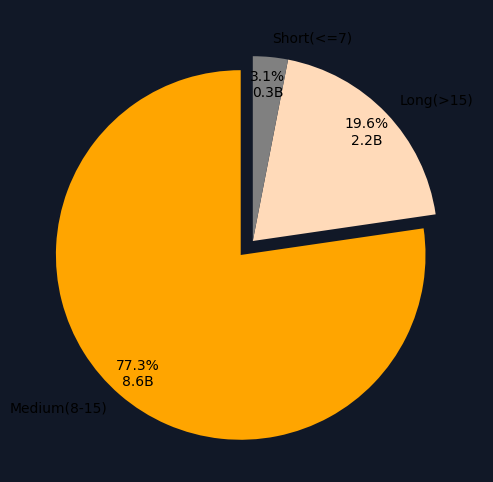

In [ ]:
# Sort categories by view counts
sorted_categories = category_views.sort_values(ascending=False)

# Define colors: darker shades of orange
colors = ['orange', 'peachpuff', 'grey']  # Darker tones for max, medium, and min
sorted_colors = [colors[i] for i in range(len(sorted_categories))]

# Set explode values to highlight the largest portion
explode = [0.1 if i == 0 else 0 for i in range(len(sorted_categories))]  # Explode the first (largest) slice

# Custom function for formatting view counts and percentages
def format_autopct(pct, values):
    total = sum(values)
    absolute = int(round(pct / 100. * total))
    return f'{pct:.1f}%\n{absolute / 1e9:.1f}B'

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    sorted_categories,
    labels=sorted_categories.index,
    autopct=lambda pct: format_autopct(pct, sorted_categories),
    startangle=90,
    colors=sorted_colors,
    explode=explode,  # Add explode effect
    pctdistance=0.85,  # Distance of autopct from center
    labeldistance=1.1  # Distance of labels from center
)

# Set chart style and title
plt.gca().set_facecolor('white')  # Set background to white
#plt.title('Distribution of Views by Title Category', color='black', fontsize=14)
plt.show()

In [ ]:
title_length.corr(df['viewCount'])

0.0049091110552588425

In [ ]:
min(title_length)

1

In [ ]:
# Filter for title lengths between 10 and 15
filtered_data = df[(title_length > 15) ]

# Calculate total view count for the filtered range
filtered_view_count = filtered_data['viewCount'].sum()

# Calculate total view count for all titles
total_view_count = df['viewCount'].sum()

# Calculate the percentage
percentage = (filtered_view_count / total_view_count) * 100

print(f"Titles with lengths between 10 and 15 contribute {percentage:.2f}% of the total views.")


Titles with lengths between 10 and 15 contribute 19.64% of the total views.


 ## 7. What is our views distribution (consider all the videos)

In [ ]:
print("Minimum view count : ",df['viewCount'].min())
print("Maximum view count : ",df['viewCount'].max())

Minimum view count :  0
Maximum view count :  888330690


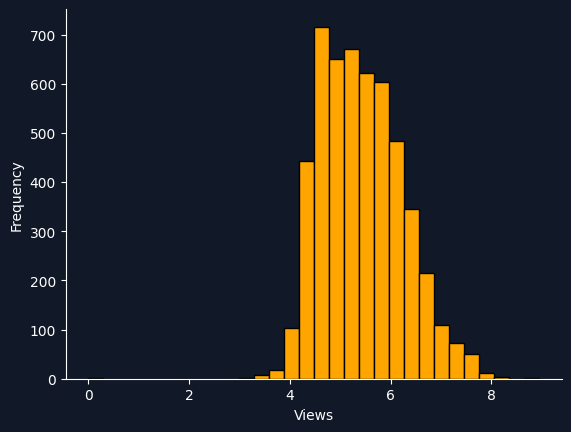

In [ ]:
# Log-transform viewCount for better visualization
log_viewCount = np.log10(df['viewCount'] + 1)  # Add 1 to avoid log(0)

plt.hist(log_viewCount, bins=30, color='orange', edgecolor='black')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()




*   A bar at log10(viewCount) = 6 indicates many videos have around 1,000,000 views.
*   A bar at log10(viewCount) = 8 indicates videos with approximately 100,000,000 views.




In [ ]:
filtered_df = df[(df['viewCount'] <100) ]

# Calculate the total views
total_views = df['viewCount'].count()

# Calculate the views below the threshold
views_below_threshold = filtered_df['viewCount'].count()

# Calculate the percentage
print((views_below_threshold / total_views) * 100)
print(views_below_threshold)



0.01948178453146308
1


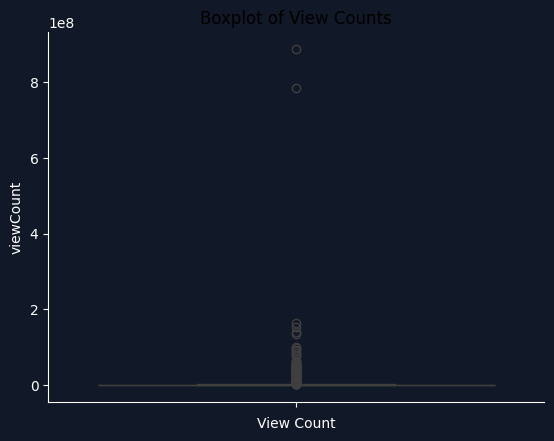

In [ ]:
sns.boxplot(df['viewCount'])
plt.title('Boxplot of View Counts')
plt.xlabel('View Count')
plt.show()


## 8. Are there certain topics or themes that consistently perform better than  others?

In [ ]:
df.head(2)

,video_id,title,description,tags,publishedAt,thumbnails,liveBroadcastContent,viewCount,likeCount,commentCount,duration,duration_category,tag_count,tag_count_bins,tag_category,day,time,time(hr),title_length
0,KQ2a4uawQBo,Meet THE REAL Honey Singh | Yo Yo Honey Singh:...,Honey Singh shares his battles with mental hea...,"['angreji beat', 'dope shope', 'honey singh', ...",2024-12-20,{'default': {'url': 'https://i.ytimg.com/vi/KQ...,none,52864,7111.0,394.0,1.183333,Short(<=5),79,70-79,Very High(>60),Friday,08:00:00,8.0,Long(>15)
1,bOR7S0j_wq8,⁠Akshay Kumar ALMOST Gets Caught Cheating! 👀 f...,Brb taking notes on how to lie like a pro 👀\r\...,"['aditya seal', 'akshay kumar', 'akshay kumar ...",2024-12-19,{'default': {'url': 'https://i.ytimg.com/vi/bO...,none,44300,642.0,30.0,3.033333,Short(<=5),68,60-69,Very High(>60),Thursday,12:30:00,12.5,Long(>15)


## 9. Are there any videos that have no tags, but performed well?

In [ ]:
df.columns

Index(['video_id', 'title', 'description', 'tags', 'publishedAt', 'thumbnails',
       'liveBroadcastContent', 'viewCount', 'likeCount', 'commentCount',
       'duration', 'duration_category', 'tag_count', 'tag_count_bins',
       'tag_category', 'day', 'time', 'time(hr)', 'title_length'],
      dtype='object')

In [ ]:
no_tag_movies = df[df['tags']==""]
print("Number of videos with no tags : ",no_tag_movies.shape[0])


Number of videos with no tags :  21


In [ ]:
no_tag_movies[no_tag_movies['viewCount']==min(no_tag_movies['viewCount'])]

,video_id,title,description,tags,publishedAt,thumbnails,liveBroadcastContent,viewCount,likeCount,commentCount,duration,duration_category,tag_count,tag_count_bins,tag_category,day,time,time(hr),title_length
5127,EKF49zJSRB4,Global | Netflix,Do you remember your first time… bingeing on N...,,2018-02-09,{'default': {'url': 'https://i.ytimg.com/vi/EK...,none,3583,35.0,8.0,0.966667,Short(<=5),0,0-9,Low(>=20),Friday,04:15:42,4.261667,Short(<=7)


In [ ]:
no_tag_movies[no_tag_movies['viewCount']==max(no_tag_movies['viewCount'])]

,video_id,title,description,tags,publishedAt,thumbnails,liveBroadcastContent,viewCount,likeCount,commentCount,duration,duration_category,tag_count,tag_count_bins,tag_category,day,time,time(hr),title_length
5112,asxx8fnzjBQ,Heating Up | Netflix,"All the hottest stories. Anytime, anywhere. Wa...",,2018-04-02,{'default': {'url': 'https://i.ytimg.com/vi/as...,none,24051981,26609.0,2410.0,0.516667,Short(<=5),0,0-9,Low(>=20),Monday,07:10:31,7.175278,Short(<=7)


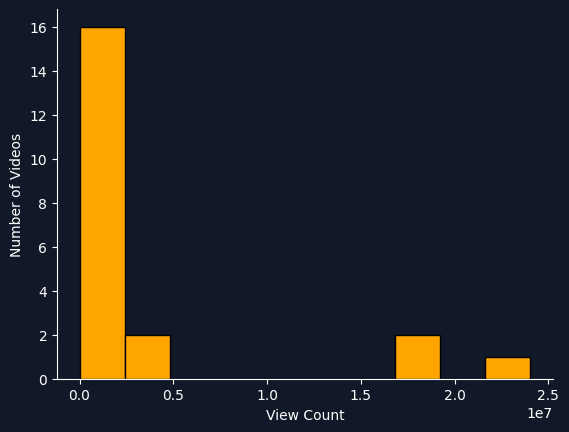

In [ ]:
# Log-transform viewCount for better visualization
#logs = np.log10(no_tag_movies['viewCount'] + 1)  # Add 1 to avoid log(0)

plt.hist(no_tag_movies['viewCount'], color='orange', edgecolor='black')
#plt.title('Log-Scaled Distribution of View Counts')
plt.xlabel('View Count')
plt.ylabel('Number of Videos')
plt.show()


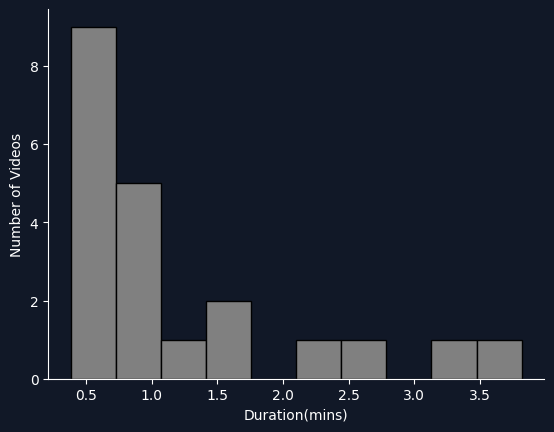

In [ ]:
plt.hist(no_tag_movies['duration'], color='grey', edgecolor='black')
#plt.title('Log-Scaled Distribution of View Counts')
plt.xlabel('Duration(mins)')
plt.ylabel('Number of Videos')
plt.show()

In [ ]:
max(no_tag_movies['viewCount'])

24051981

In [ ]:
((no_tag_movies['commentCount'].sum()+no_tag_movies['likeCount'].sum())/no_tag_movies['viewCount'].sum())*100

0.18771471774922618

## What is the frequency of video publishing?

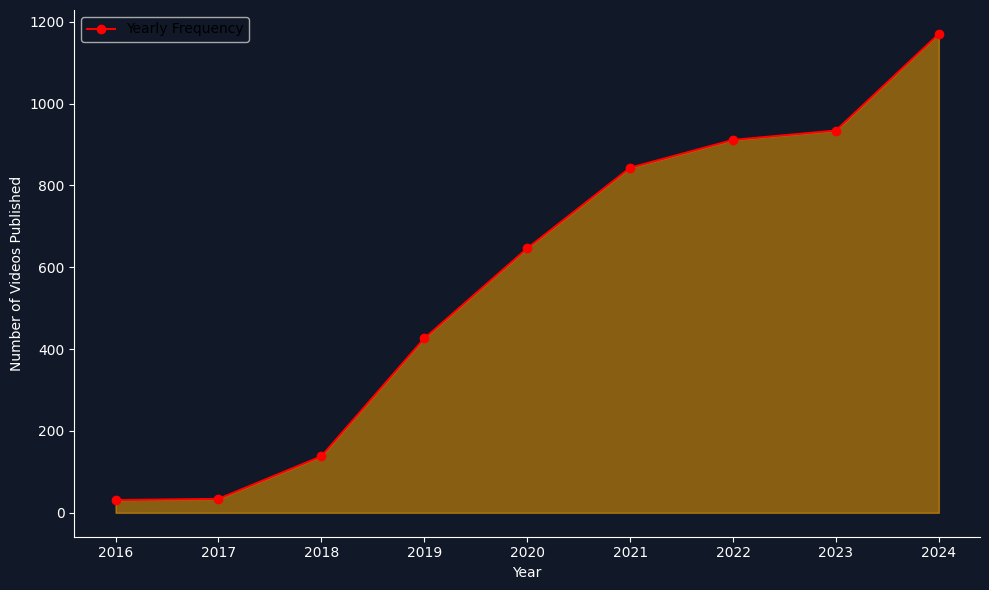

In [ ]:
# Ensure 'publishedAt' is in datetime format
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Calculate yearly frequency
yearly_frequency = df['publishedAt'].dt.year.value_counts().sort_index()

# Plot area graph
plt.figure(figsize=(10, 6))
plt.fill_between(yearly_frequency.index, yearly_frequency.values, color='orange', alpha=0.5)
plt.plot(yearly_frequency.index, yearly_frequency.values, color='red', marker='o', label='Yearly Frequency')
#plt.title('Yearly Video Publishing Frequency (Area Graph)')
plt.xlabel('Year')
plt.ylabel('Number of Videos Published')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df[df['publishedAt'].dt.year==2024].shape

(1170, 19)

In [ ]:
df['duration'].median()

2.2333333333333334

In [ ]:
((df['commentCount'].sum()+df['likeCount'].sum())/df['viewCount'].sum())*100

1.2458451007171434

## 11.What are the keywords we used the most in tags?

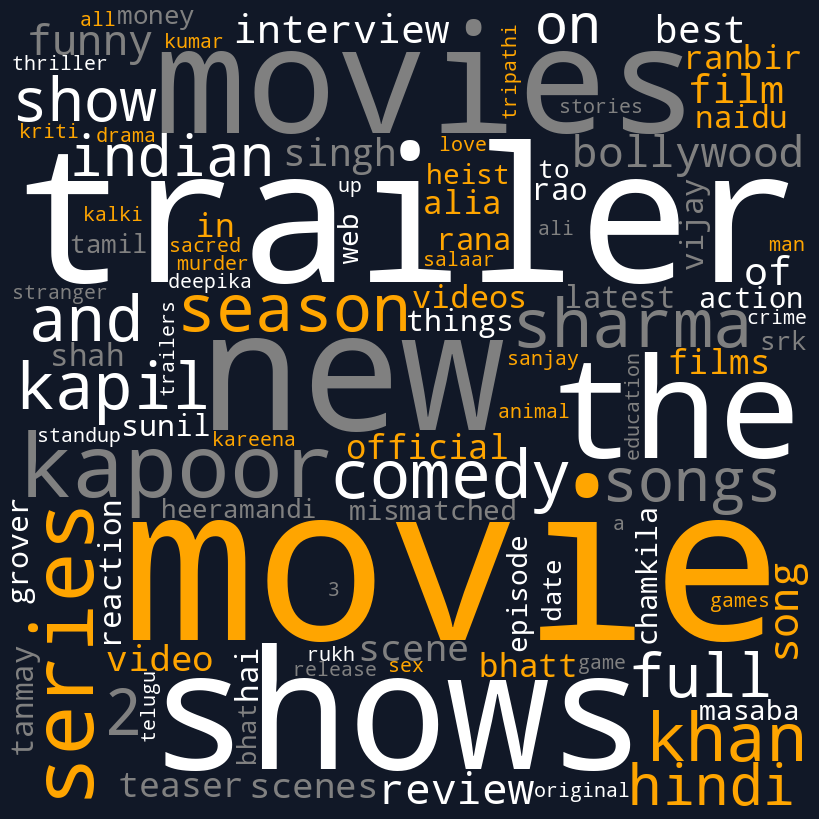

In [ ]:
df['tags'] = df['tags'].str.replace(r'[^\w\s]', '', regex=True)
df['tags'] = df['tags'].str.lower()


# Create a single string from the 'tags' column
text = ' '.join(df['tags'])

# Count word frequencies
word_counts = Counter(text.split())

# Adjust frequencies for specific words
word_counts['netflix'] = 0
word_counts['india'] = 0

# Limit to top 100 most common words
top_100_words = dict(word_counts.most_common(100))

# Define a custom color function
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["orange", "#ffffff", "#808080"]  # Red, White, Grey
    return random.choice(colors)

# Generate the WordCloud with the top 100 words
wordcloud = WordCloud(width=800, height=800,
                      background_color='#111827',
                      color_func=custom_color_func,
                      min_font_size=10).generate_from_frequencies(top_100_words)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## 12.What is the most used keyword in YT titles?

In [ ]:
df.columns

Index(['video_id', 'title', 'description', 'tags', 'publishedAt', 'thumbnails',
       'liveBroadcastContent', 'viewCount', 'likeCount', 'commentCount',
       'duration', 'duration_category', 'tag_count', 'tag_count_bins',
       'tag_category', 'day', 'time', 'time(hr)', 'title_length'],
      dtype='object')

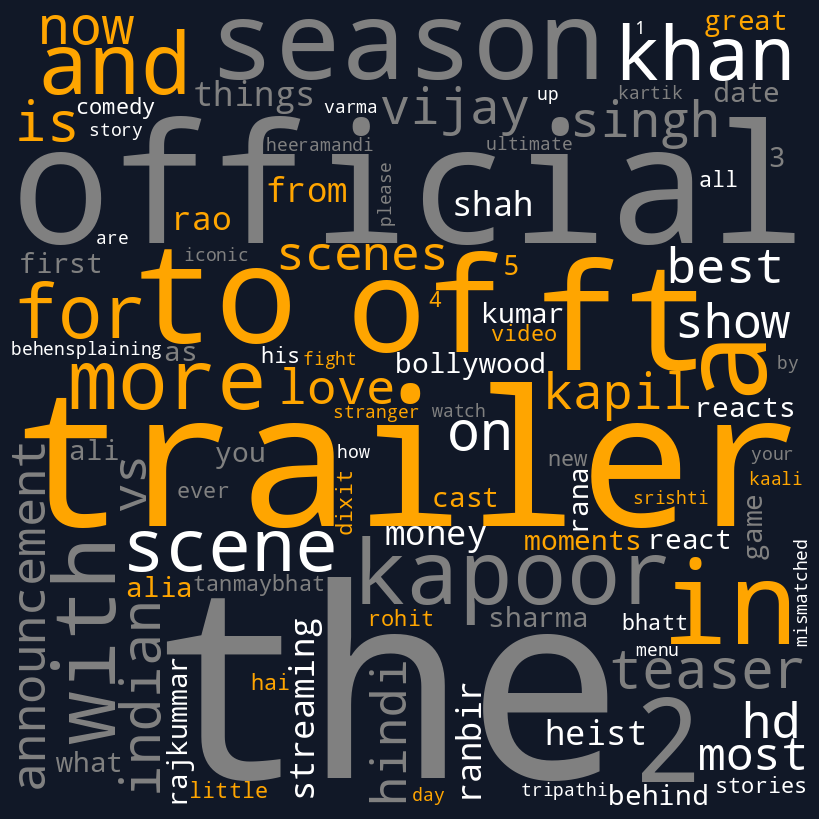

In [ ]:
# Removing special characters from 'tags'
df['title'] = df['title'].str.replace(r'[^\w\s]', '', regex=True)
df['title'] = df['title'].str.lower()

# Create a single string from the 'tags' column
text = ' '.join(df['title'])

# Count word frequencies
word_counts = Counter(text.split())

# Adjust frequencies for specific words
word_counts['netflix'] = 0
word_counts['india'] = 0

# Limit to top 100 most common words
top_100_words = dict(word_counts.most_common(100))

# Define a custom color function
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["orange", "#ffffff", "#808080"]  # Red, White, Grey
    return random.choice(colors)

# Generate the WordCloud with the top 100 words
wordcloud = WordCloud(width=800, height=800,
                      background_color='#111827',
                      color_func=custom_color_func,
                      min_font_size=10).generate_from_frequencies(top_100_words)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
